<a href="https://colab.research.google.com/github/aminyG/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## English Modul

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,
TOZERO_INV) according to the description from the chart shown above.

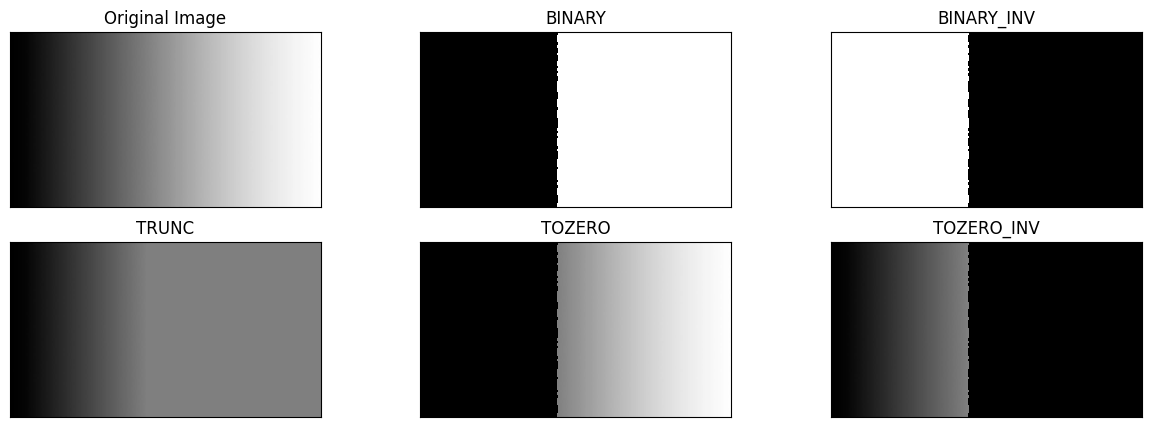

In [3]:
# The following code shows the use of the OpenCV cv.Threshold library

filename = ('/content/drive/MyDrive/pcvk/photo/gradient.jpg')
img = cv.imread(filename)
thresh = 127 #specified Threshold value
#1. thresh1 if the pixel in img>127, then thresh1 has a value of 1 (white) otherwise it has a value of 0 (black)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1), plt.imshow(images[i], 'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

4. Create Otsu Thresholding without using the Library. Also display the threshold value when you use Otsu's, as shown in the following image . (use the image lena_gs_lc2.jpg so that it really looks different between the otsu's results and
the usual global threshold)


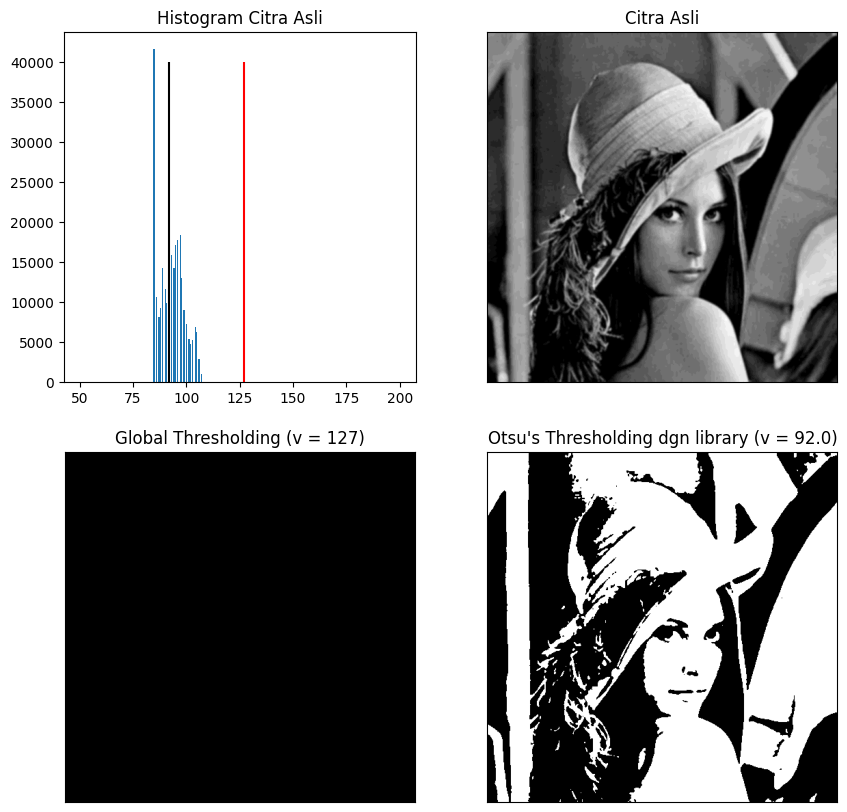

<ipython-input-4-9c907899b88f>:45: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb
<ipython-input-4-9c907899b88f>:46: RuntimeWarning: invalid value encountered in divide
  mf = (sumb - sumb)/wf


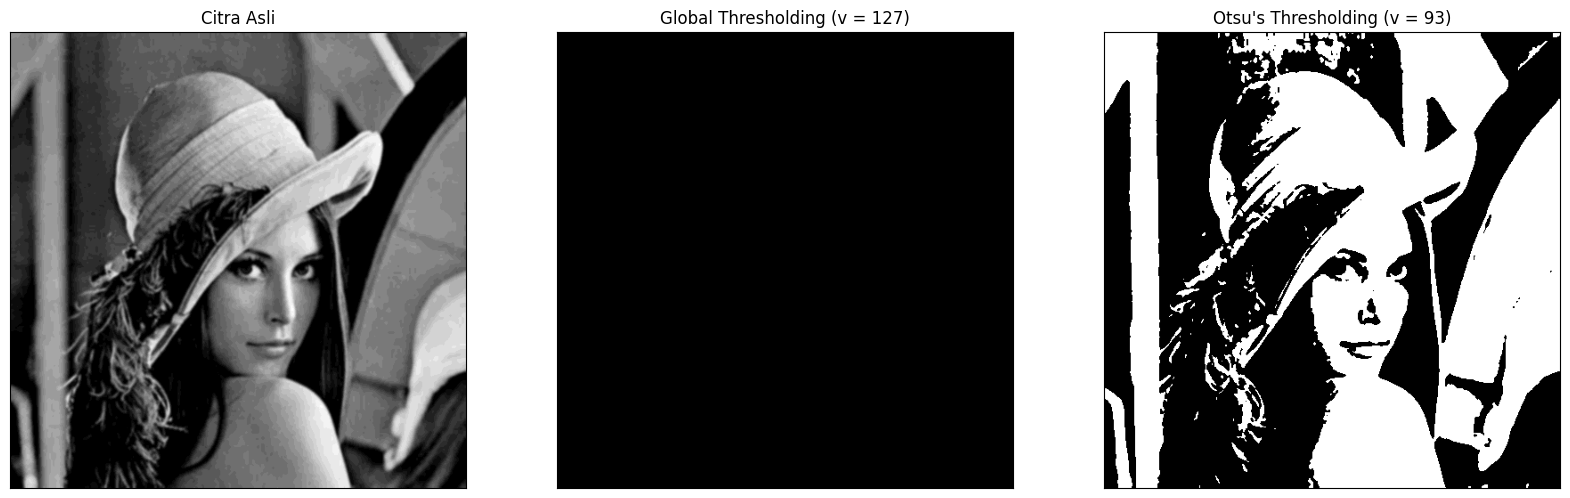

In [4]:
# No 4 menggunakan library
filename_2 = ('/content/drive/MyDrive/pcvk/photo/lena_gs_lc2.jpg')
img_lgs = cv.imread(filename_2, 0)
blur = cv.GaussianBlur(img_lgs,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

# tanpa menggunakan library
img_lgs = cv.imread(filename_2, 0)
blur = cv.GaussianBlur(img_lgs, (5,5),0)
hist = cv.calcHist([blur],[0],None,[256], [0,256])

hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
varmax = 0
fn_min = np.inf
thresh = -1

for i in range(0,255):
  wb += hist[i]
  wf = (img_lgs.shape[0]*img_lgs.shape[1]) - wb
  sumb += (i*hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

5. Create a histogram from a segmented image, the histogram is only in the foreground image. Use the Lily or Leaves image provided in the images folder .
Instructions:
- You can use cv.calcHist to display a histogram.
- Open the folloiwng link https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- From the link, note that cv.calcHist has one of the parameters, namely mask.
If set to None, the entire image histogram will be counted. If we specify a mask, only the part of the image masked in white will be calculated for the histogram (from the example below it is called Image Segment).

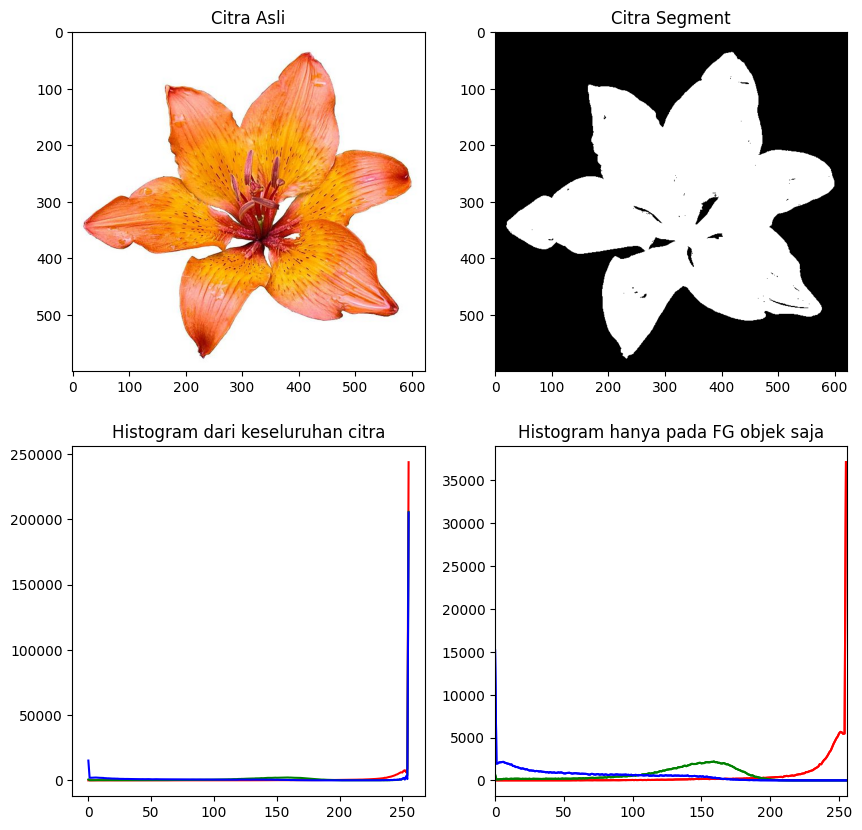

In [5]:
filename_3 = ('/content/drive/MyDrive/pcvk/photo/lily.jpg')
img_l = cv.imread(filename_3)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Perform color segmentation on the image "peppers.jpg", display only yellow colors . (Hint: you can use K-Means to display only certain colors)

(<Axes: >, <matplotlib.image.AxesImage at 0x7eaf12a761d0>)

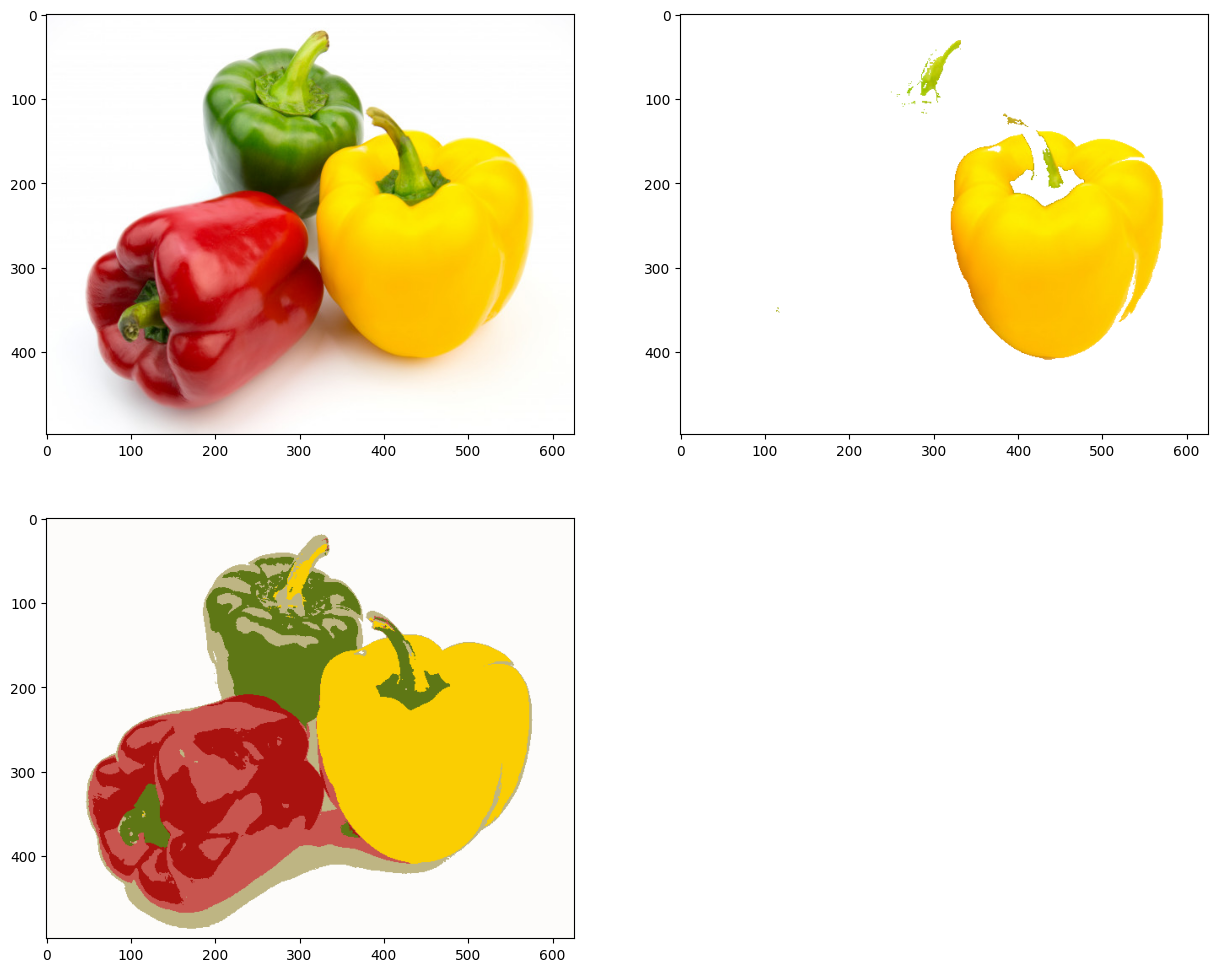

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/pcvk/photo/peppers.jpg')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


pixel_values = img.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

#The condition for stopping iteration from KMeans is if the centroid has not shifted too much position between the current iteration and the previous iteration (converges).
#Because the amount of data is large,
#we will stop the iteration when the number of iterations = 100 or epsilon (the difference between the current centroid position and the centroid position in the previous iteration) <0.2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#If you look at the original image, there are 3 main colors (green, blue, and white/orange). For this experiment we will use 3 clusters for this image
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert centroid points into integers
centers = np.uint8(centers)

#flattening array labels
labels = labels.flatten()

#conversion of the original pixel color to the color of each centroid
segmented_image = centers[labels.flatten()]
# reshape to the original image
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0= masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)


plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)


7. Open the crossword.jpg file. With the knowledge of thresholding that you have learned. Perform binary thresholding with the best results in your opinion. Copy the code and image results in this module.

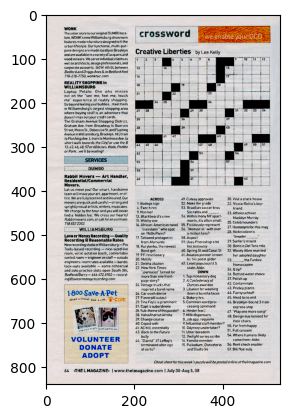

In [14]:
img_c = cv2.imread('/content/drive/MyDrive/pcvk/photo/crossword.jpg')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Bahasa Indonesia Modul

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas